Mô hình keras: là một giao diện lập trình ứng dụng(API) mạng thần kinh cho python được tích hợp chặt chẽ với tensorflow,được sử dụng để xây dựng mô hình học máy.Các mô hình của Keras cung cấp một cách đơn giản, thân thiện với người dùng để xác định một mạng nơ-ron, sau đó sẽ được TensorFlow xây dựng cho bạn. 

# Tensorflow và keras:
TensorFlow là một bộ thư viện mã nguồn mở để tạo và làm việc với mạng nơ-ron, chẳng hạn như những thư viện được sử dụng trong các dự án Học máy (ML) và Học sâu. 
Mặt khác, Keras là một API cấp cao chạy trên TensorFlow. Keras đơn giản hóa việc triển khai các mạng nơ-ron phức tạp với khuôn khổ dễ sử dụng của nó.

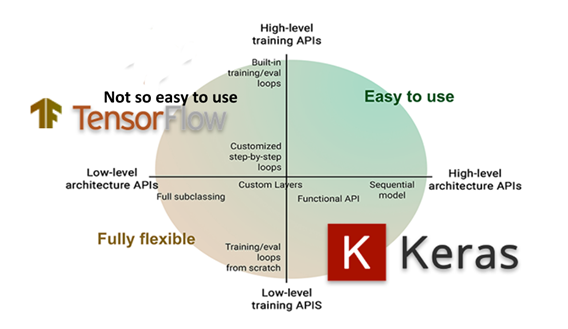

 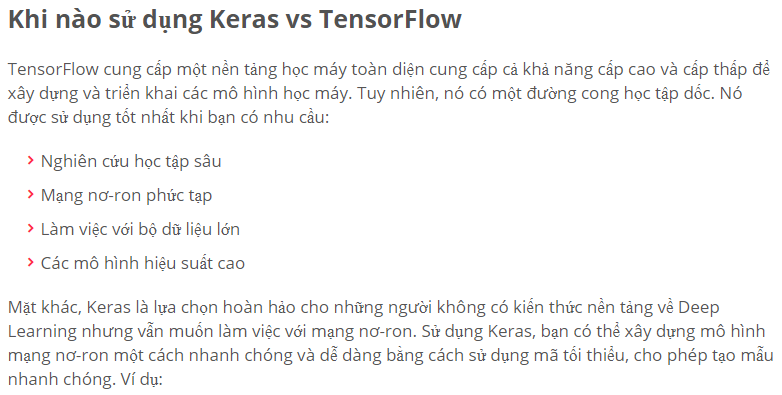

In [3]:
# Import the Keras libraries required in this example: 
from keras.models import Sequential
from keras.layers import Dense, Activation
# Create a Sequential model: 
model = Sequential()
# Add layers with the add() method: 
model.add(Dense(32, input_dim=784,activation='relu')) 
#model.add(Activation('relu'))

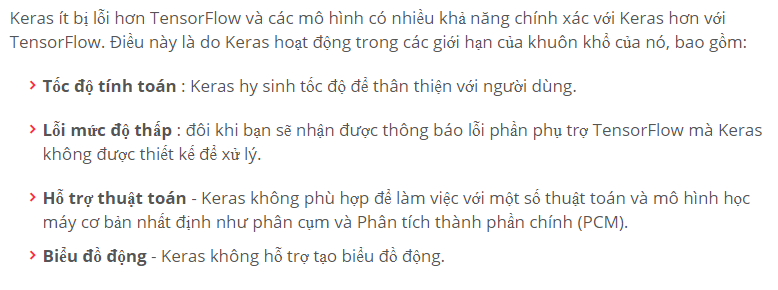

#  Keras model
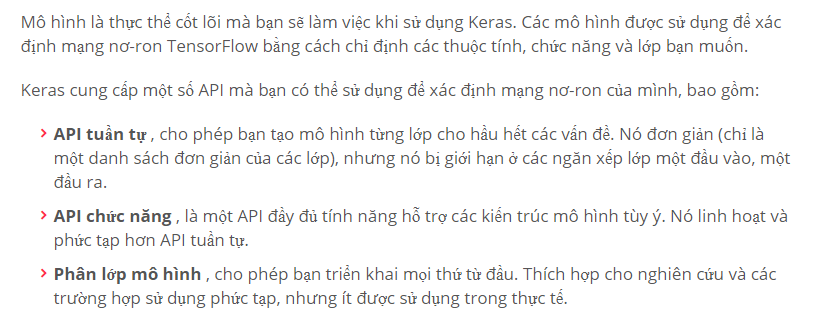

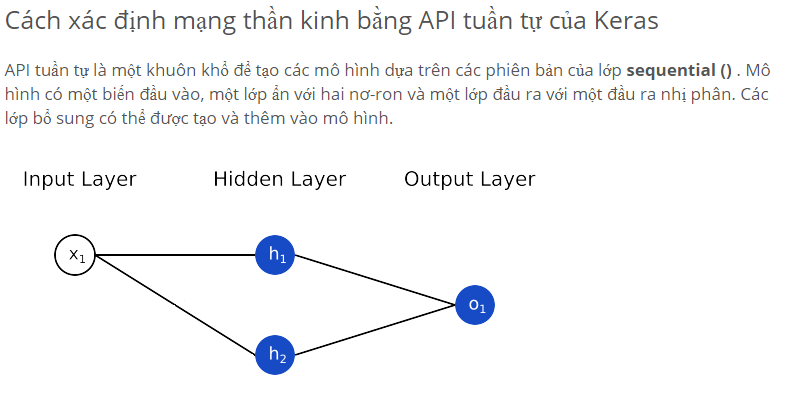

In [4]:
# Define the model:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

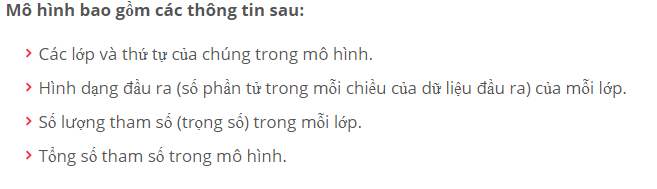

In [5]:
#hàm summary:được sử dụng để tạo và in tóm tắt về mô hình
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 4         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [6]:
#cách triển khai mô hình tuần tự:
#C1:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])
#C2:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))

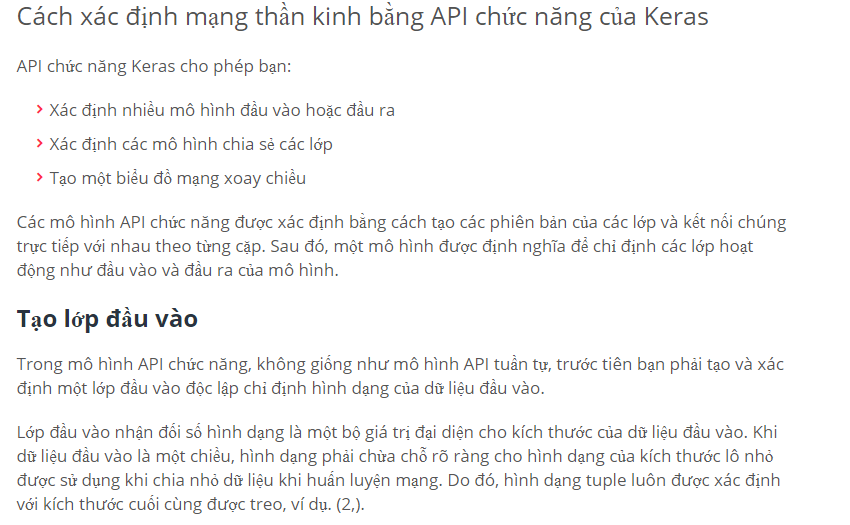

In [7]:
# Define the input layer:
from keras.layers import Input
visible = Input(shape=(2,))

In [8]:
# Connect the layers, then create a hidden layer as a Dense 
# that receives input only from the input layer:
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)

# tạo mô hình với API chức năng

In [9]:
# Define a Functional API model:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

## Cách Sử Dụng Mô Hình Keras Để Đưa Ra Dự Đoán 

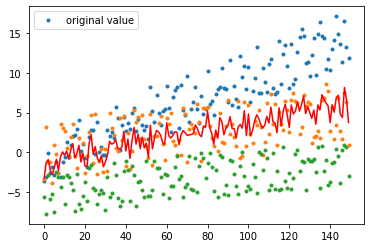

In [1]:
# PREPARE THE DATA

# Import libraries required in this example:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

# Generate a sample dataset from random data: 
random.seed(123)
def CreateDataset(N):
    a,b,c,y = [],[],[],[]
    for i in range(N):    
        aa = i/10+random.uniform(-4,3)
        bb = i/30+random.uniform(-4,4)
        cc = i/40+random.uniform(-3,3)-5
        yy = (aa+bb+cc/2)/3
        a.append([aa])
        b.append([bb])
        c.append([cc])
        y.append([yy])
    return np.hstack([a,b,c]), np.array(y)
N = 150
x,y = CreateDataset(N)
x_ax = range(N)
plt.plot(x_ax, x, 'o', label="original value", markersize=3)
plt.plot(x_ax, y, lw=1.5, color="red", label="y")
plt.legend(['original value'])
plt.show()

In [2]:
# Define and build a Sequential model, and print a summary:
def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=3,activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(8,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model
BuildModel().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


C:\Users\Hi\AppData\Local\Temp/ipykernel_9460/2077036390.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)


50/50 [==============================] - 0s 680us/step
0.10554167479389039


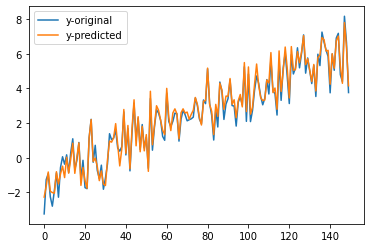

In [3]:
# Fit the Sequential model with Scikit-learn Regressor API for Keras:
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(x,y) 

y_pred = regressor.predict(x)
mse_krr = mean_squared_error(y, y_pred)
print(mse_krr)

plt.plot(y, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

5/5 [==============================] - 0s 998us/step
0.00039985037364381266


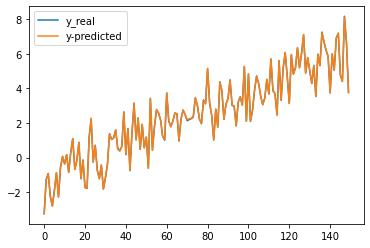

In [7]:
# Fit the model without the KerasRegressor wrapper:
model = BuildModel()
model.fit(x, y, epochs=100, verbose=False, shuffle=False)
y_krm = model.predict(x)
mse_krm=mean_squared_error(y, y_krm)
print(mse_krm)
plt.plot(y,label="y_real")
plt.plot(y_krm, label="y-predicted")
plt.legend()
plt.show()

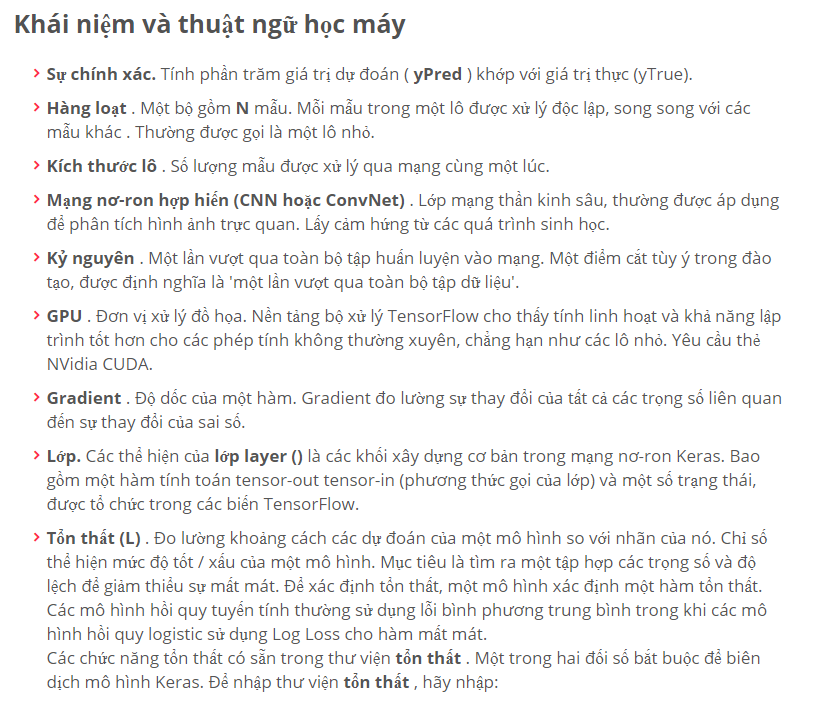

## hàm lỗi

In [12]:
from keras import losses as loss
loss.Loss

keras.losses.Loss

## một số hàm lỗi cơ bản:
#### mean_squared_error
#### mean_absolute _error
#### hinge
#### mean_absolute_percentage _error
#### mean_squared_logarithmic_error
#### Poisson
#### binary_crossentropy
#### categorical_crossentropy

## hàm tính toán hiệu suất

In [2]:
from keras import metrics as m
m.accuracy
m.binary_accuracy
m.categorical_accuracy
m.cosine_proximity
m.clone_metric

<function keras.metrics.base_metric.clone_metric(metric)>

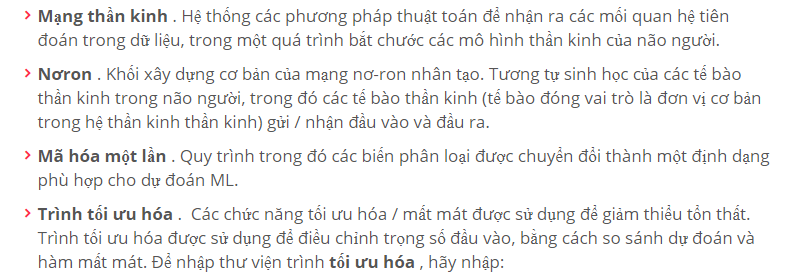

In [3]:
from keras import optimizers as op
op.SGD
op.RMSprop
op.Adagrad
op.Adam
op.Adamax
op.Nadam

keras.optimizers.optimizer_v2.nadam.Nadam

In [5]:
op.Adam(learning_rate=0.001)
#model.compile(loss="mean_squared_error", optimizer="adam")

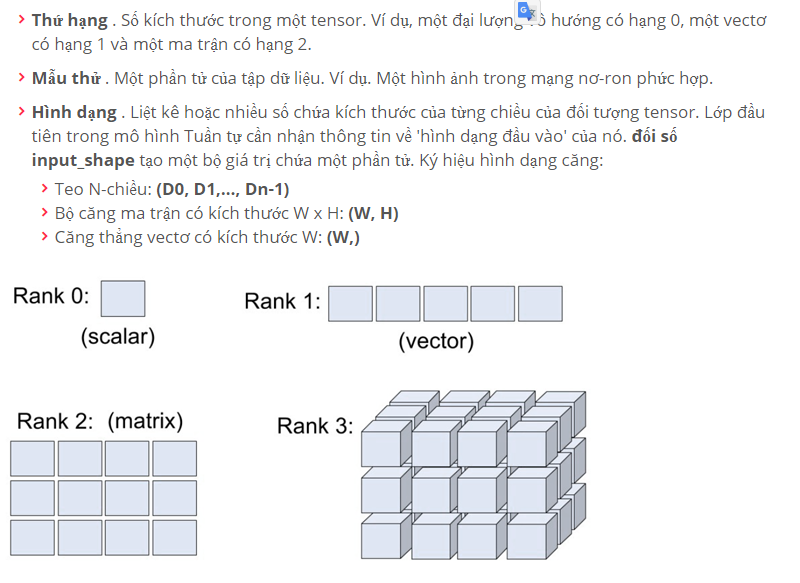
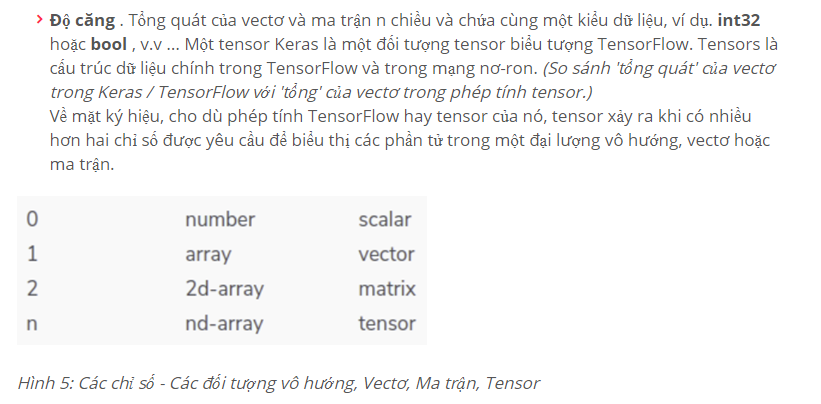
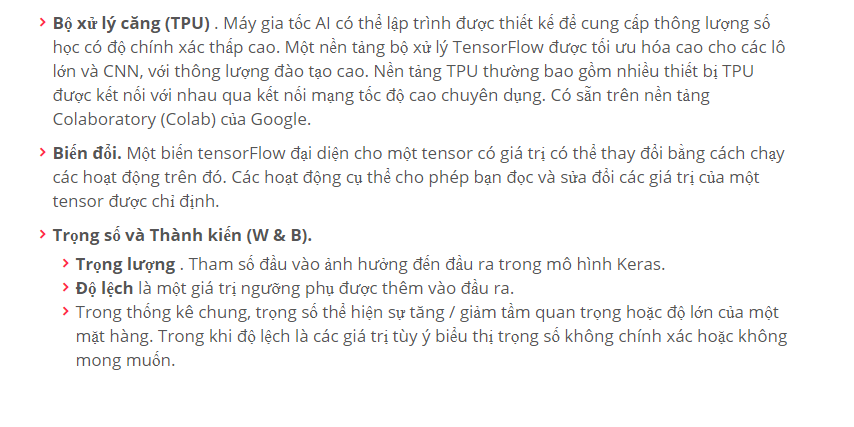